# Politicians on Wikipedia

<img src="wikipedia.jpg">

# Required Libraries

In [129]:
import pandas as pd
import wikipedia
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import wordcloud
warnings.filterwarnings("ignore")
%matplotlib inline

# Methods to be used

In [207]:
def get_top(sort_by, top_x=10):
    """ Returns top_x rows of dataframe sorted by column {sorted_by}
    """
    return data.sort_values(sort_by,ascending=False).head(top_x)

def distribution_plot(column, x_scale="linear", y_scale="linear"):
    grid = sns.distplot(data[column])       
#     grid.set(xscale="log")

def flatten(data, col):
    f_list = [item for sublist in data[col].values for item in sublist]
    return f_list

def wordcloud_col(col = "occupation"):
    lst = flatten(data, col)
    if col == "occupation":
        lst = [i for i in lst if i != "politician"] 
    counts = Counter(lst)
    wc = wordcloud.WordCloud().generate_from_frequencies(counts)
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    
def bar_col(col = "party"):
    lst = flatten(data, col)
    if col == "occupation":
        lst = [i for i in lst if i != "politician"] 
    counts = Counter(lst).most_common(10)
    df = pd.DataFrame(counts, columns=['label', 'value'])
    sns.barplot(df["value"], df["label"])
    
def word_cloud_txt(df):
    wc = wordcloud.WordCloud().generate(" ".join(df["page_content"].values))
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

# Loading Data

In [22]:
data = pd.read_pickle("german_politicians")

In [23]:
data.head()

,WikiURL,gender,name,party,nationality,entered,occupation,out_degree,in_degree,eig_central,views
7,http://en.wikipedia.org/wiki/Otto_Hoetzsch,male,[ hoetzsch otto ],[],[german],2011,[politician],1,0,2.021104e-19,1652.0
113,http://en.wikipedia.org/wiki/Adolf_Grimme,male,"[ adolf grimme , grimme adolf ]",[],[german],2012,[politician],3,2,2.530002e-05,2376.0
127,http://en.wikipedia.org/wiki/Heinz_Jost,male,[ jost heinz ],[],[german],2009,"[nazism, politician]",4,0,-1.456437e-19,32143.0
132,http://en.wikipedia.org/wiki/Heinz_Neukirchen,male,"[ heinz neukirchen , neukirchen heinz ]",[],[german],2009,[politician],1,1,9.096369e-08,2268.0
158,http://en.wikipedia.org/wiki/Wilhelm_von_Bismarck,male,"[ wilhelm , wilhelm otto albrecht von bismarc...",[],[german],2011,[politician],2,2,7.461692e-04,19536.0


# Gender distribution

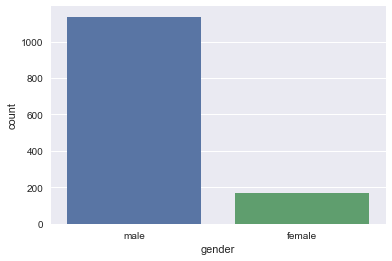

In [16]:
sns.countplot(x="gender", data=data)

# Gender distribution over time 

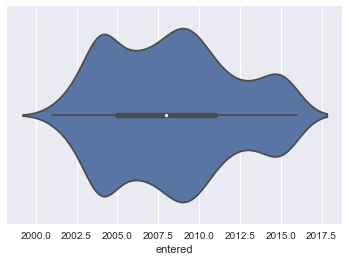

In [161]:
sns.violinplot(x="entered", hue="gender", data=data, split=True)

# Professions

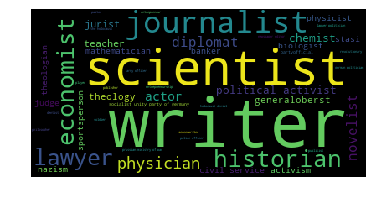

In [139]:
wordcloud_col()

In [159]:
bar_col()

# Most links from other polititians

In [31]:
get_top("in_degree", top_x=5)

,WikiURL,gender,name,party,nationality,entered,occupation,out_degree,in_degree,eig_central,views
4526,http://en.wikipedia.org/wiki/Adolf_Hitler,male,[ adolf hitler ],[ nazi party ],"[austrian, german]",2001,"[writer, politician]",35,470,0.067276,10405306.0
262,http://en.wikipedia.org/wiki/Angela_Merkel,female,[ angela merkel ],"[ democratic awakening , christian democratic...",[german],2002,"[politician, chemist, scientist]",51,205,0.050544,2404469.0
25707,http://en.wikipedia.org/wiki/Heinrich_Himmler,male,[],[ nazi party ],[german],2001,[politician],18,109,0.011311,1752731.0
21256,http://en.wikipedia.org/wiki/Otto_von_Bismarck,male,[ otto von bismarck ],[ independent politician ],[german],2001,"[politician, writer]",16,108,0.014413,1176348.0
10002,http://en.wikipedia.org/wiki/Helmut_Kohl,male,[ helmut kohl ],[ christian democratic union of germany ],[german],2002,[politician],33,87,0.032111,293055.0


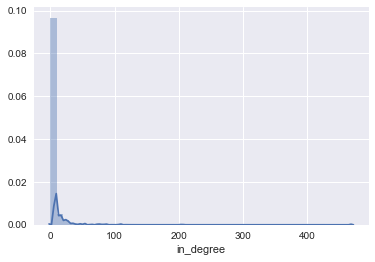

In [61]:
# sns.countplot(x="gender", data=data)
distribution_plot("in_degree")

# Most links to other politicians

In [32]:
get_top("out_degree", top_x=5)

,WikiURL,gender,name,party,nationality,entered,occupation,out_degree,in_degree,eig_central,views
262,http://en.wikipedia.org/wiki/Angela_Merkel,female,[ angela merkel ],"[ democratic awakening , christian democratic...",[german],2002,"[politician, chemist, scientist]",51,205,0.050544,2404469.0
35030,http://en.wikipedia.org/wiki/Richard_von_Weizs...,male,[ baron richard von weizsäcker ],[ christian democratic union of germany ],[german],2003,[politician],44,19,0.003132,70862.0
11078,http://en.wikipedia.org/wiki/Frank-Walter_Stei...,male,[ frank-walter steinmeier ],[ social democratic party of germany ],[german],2005,[politician],42,40,0.005699,88315.0
37847,http://en.wikipedia.org/wiki/Gerhard_Schröder,male,[ gerhard schröder ],[ social democratic party of germany ],[german],2002,[politician],41,85,0.027715,210205.0
11132,http://en.wikipedia.org/wiki/Martin_Schulz,male,[ martin schulz ],"[ social democratic party of germany , party ...",[german],2003,[politician],39,28,0.003767,261551.0


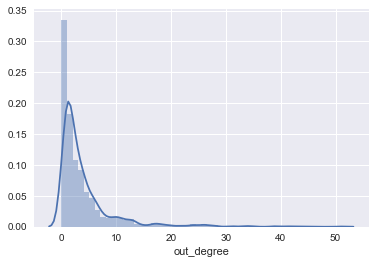

In [44]:
distribution_plot("out_degree")

# Number of views

In [46]:
get_top("views", top_x=5)

,WikiURL,gender,name,party,nationality,entered,occupation,out_degree,in_degree,eig_central,views
4526,http://en.wikipedia.org/wiki/Adolf_Hitler,male,[ adolf hitler ],[ nazi party ],"[austrian, german]",2001,"[writer, politician]",35,470,0.067276,10405306.0
262,http://en.wikipedia.org/wiki/Angela_Merkel,female,[ angela merkel ],"[ democratic awakening , christian democratic...",[german],2002,"[politician, chemist, scientist]",51,205,0.050544,2404469.0
5475,http://en.wikipedia.org/wiki/Joseph_Goebbels,male,[],[ nazi party ],[german],2001,[politician],24,75,0.015818,1867025.0
25707,http://en.wikipedia.org/wiki/Heinrich_Himmler,male,[],[ nazi party ],[german],2001,[politician],18,109,0.011311,1752731.0
37017,"http://en.wikipedia.org/wiki/Wilhelm_II,_Germa...",male,"[ wilhelm ii , frederick william victor albert ]",[],[german],2002,[politician],25,51,0.011296,1745370.0


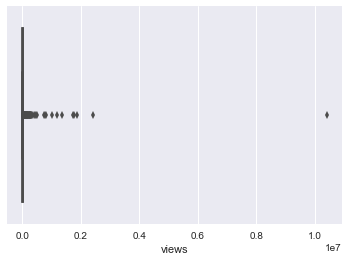

In [64]:
sns.boxplot(data["views"])

# Relationships between variables

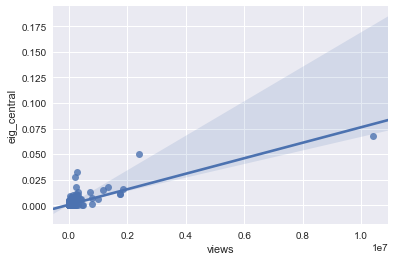

In [66]:
sns.regplot("views","eig_central", data=data)

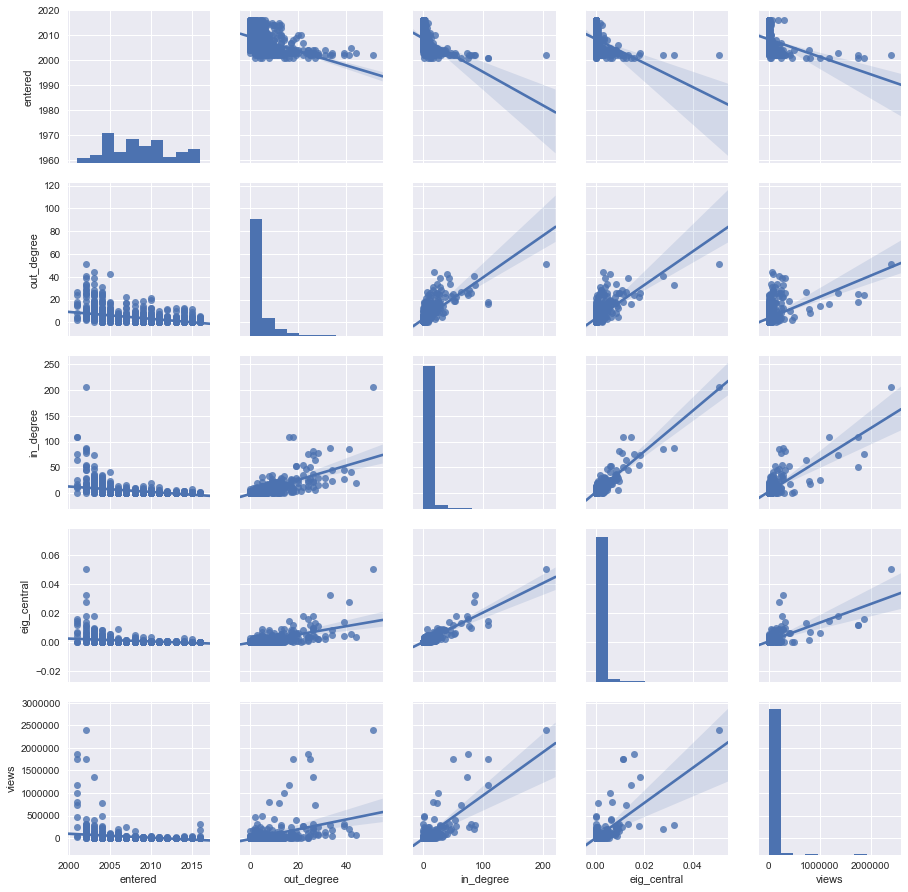

In [79]:
data2 = data.drop(4526)
data2
sns.pairplot(data2, kind='reg')

# Using the Wikipedia API

 <img src="api.png">

In [163]:
# data = pd.read_pickle("2016")
# german_p = []
# for index, row in data.iterrows():
#     if "german" in row["nationality"]:
#         german_p.append(row)
# pd.DataFrame(german_p)[["WikiURL","gender", "name", "party", "nationality", "entered", "occupation","out_degree", "in_degree", "eig_central", "views"]].to_pickle("german_politicians")
# # pd.DataFrame(germans).head()[["WikiURL","gender", "name", "party", "nationality", "entered", "occupation","out_degree", "in_degree", "eig_central"]]

In [194]:
def add_page_content(df,gender):
    """ Returns contents of wikipedia pages from the dataframe
    """
    df = df[df["gender"] == gender].head(50)
    df["page_content"] = df["WikiURL"].apply(lambda x: page_content(x))
    return df

In [195]:
def page_content(url):
    try:
        return wikipedia.page(url.split("/")[-1]).content.replace("\n","").replace("==", "")
    except:
        return ""

In [196]:
f_content = add_page_content(data, "female")

In [197]:
# " ".join(f_content["page_content"].values)

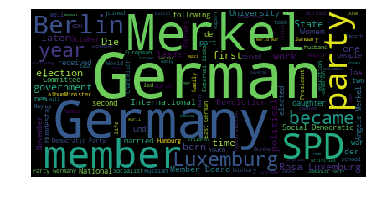

In [206]:
word_cloud_txt(f_content)